# Лабораторная работа №7

# Морозова Маргарита, РИ-481223

### Вариант 12

In [12]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

Функция для разложения:

In [2]:
def SSA_modes(F, L):
  
    N = len(F)
    K = N - L + 1
    X = np.empty((L, K))
    
    for i in range (L):
        for j in range (K):
            X[i][j] = F[i+j]
            
    S = np.dot(X, X.T)    
    U, A, _ = np.linalg.svd(S) 
    V = np.dot(X.T, U) 
    
    return A, U, V # где A - массив собственных чисел, U - матрица собственных векторов, V - матрица траекторных векторов.

Проверяем правильность и работоспособность данной функции на следующем простом примере:

In [5]:
ts = np.array([3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3]) # мини временной ряд
A, U, V = SSA_modes(ts, 3) # его разложение с длиной окна = 3
print('A: ', A) # собственные числа
print('U: ', U) # собственные вектора
print('V: ', V) # траекторные вектора

A:  [129.66842566  12.           3.33157434]
U:  [[-5.78869570e-01  7.07106781e-01  4.06091149e-01]
 [-5.74299610e-01  3.88578059e-16 -8.18645196e-01]
 [-5.78869570e-01 -7.07106781e-01  4.06091149e-01]]
V:  [[-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00  0.00000000e+00  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]
 [-4.03837711e+00  6.66133815e-16 -8.31570994e-01]
 [-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00  0.00000000e+00  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]
 [-4.03837711e+00  6.66133815e-16 -8.31570994e-01]
 [-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00  0.00000000e+00  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]]


Результаты совпали, следовательно, функция реализована правильно.

Функция для восстановления ряда:

In [6]:
def SSA_group(A, U, V, N, I):

    L = len(A)
    K = N - L + 1
    
    V = V.transpose()
    Z = np.dot(U[:, I], V[I, :]) 
    
    G = np.zeros(N) 
    Lmin = min(L, K)
    Kmax = max(L, K)
    for k in range(N):
        g=0
        if (k < Lmin - 1):
            for m in range (0, k+1):
                g = g + Z[m][k-m]
            G[k] = g / (k+1)
            
        elif (k < Kmax):
            for m in range (0, Lmin):
                g = g + Z[m][k-m]
            G[k] = g / Lmin
            
        elif (k < N + 1):
            for m in range (k-Kmax+1, N-Kmax+1):
                g = g + Z[m][k-m]
            G[k] = g / (N-k)
            
    return G # G - массив отсчетов восстановленного ряда

Проверка работоспособности функции SSA_group

In [7]:
ts1 = SSA_group(A, U, V, len(ts), [0, 1, 2])
print(ts1)

[3. 2. 1. 2. 3. 2. 1. 2. 3. 2. 1. 2. 3.]


Функция реальзована правильно.

Строим каждую компоненту отдельно (массив группировки [0], затем [1],затем [2]), и их попарные комбинации ([0, 1], [0, 2], [1, 2]).

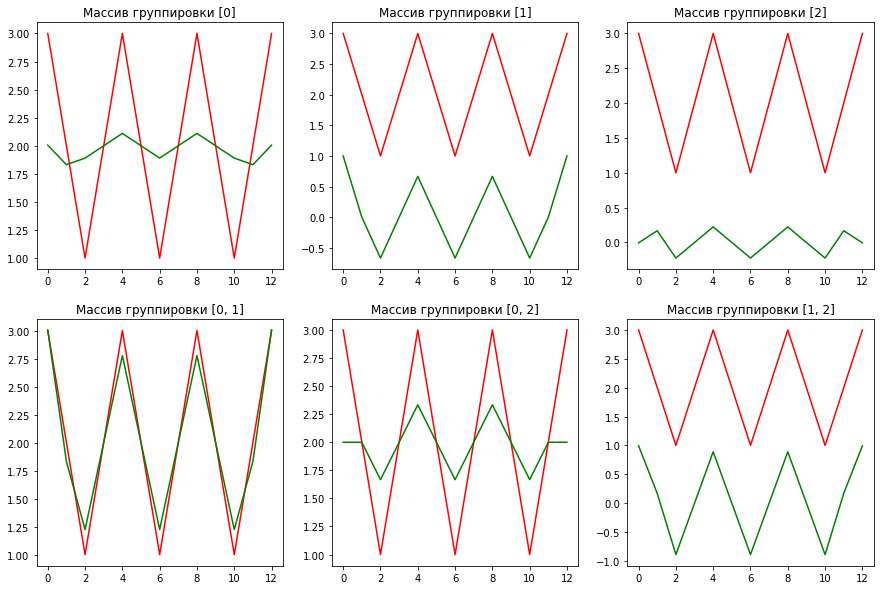

In [82]:
plt.figure(figsize = (15, 10))

ts1_0 = SSA_group(A, U, V, len(ts), [0])
plt.subplot(2,3,1)
plt.plot(ts, 'r')
plt.plot(ts1_0, 'g')
plt.title('Массив группировки [0]')

ts1_1 = SSA_group(A, U, V, len(ts), [1])
plt.subplot(2,3,2)
plt.plot(ts, 'r')
plt.plot(ts1_1, 'g')
plt.title('Массив группировки [1]')

ts1_2 = SSA_group(A, U, V, len(ts), [2])
plt.subplot(2,3,3)
plt.plot(ts, 'r')
plt.plot(ts1_2, 'g')
plt.title('Массив группировки [2]')

ts1_01 = SSA_group(A, U, V, len(ts), [0, 1])
plt.subplot(2,3,4)
plt.plot(ts, 'r')
plt.plot(ts1_01, 'g')
plt.title('Массив группировки [0, 1]')

ts1_02 = SSA_group(A, U, V, len(ts), [0, 2])
plt.subplot(2,3,5)
plt.plot(ts, 'r')
plt.plot(ts1_02, 'g')
plt.title('Массив группировки [0, 2]')

ts1_12 = SSA_group(A, U, V, len(ts), [1, 2])
plt.subplot(2,3,6)
plt.plot(ts, 'r')
plt.plot(ts1_12, 'g')
plt.title('Массив группировки [1, 2]')
plt.show()

Во-первых, 0-компонента содержит некоторое среднее плавающее значение ряда (тренд), а уже 1-компонента и 2-компонента имеют среднее значение близкое к нулю. Во-вторых, 1-компонента и 2-компонента имеют одинаковый период, так как любая периодическая составляющая методом SSA всегда разлагается на парные компоненты. В-третьих, амплитуда 1-компоненты выше амплитуды 2-компоненты, так как массив собственных чисел упорядочен по убыванию, то есть с ростом номера компоненты ее «вклад» в исходный ряд уменьшается.


Строим модельный ряд из 2 периодик с шумом:

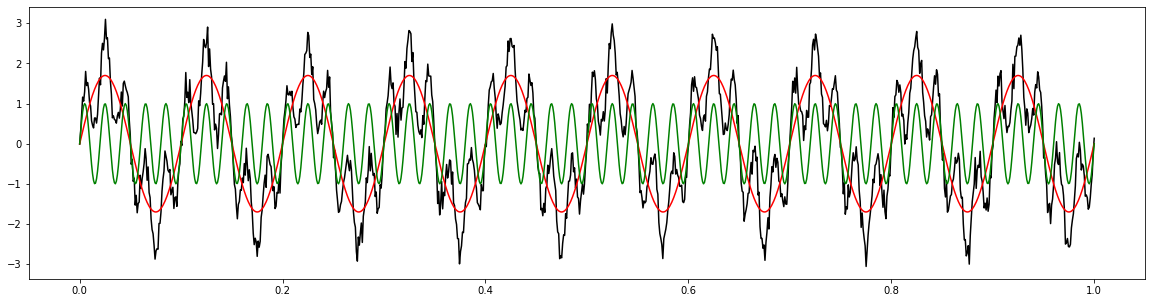

In [18]:
t = np.linspace(0, 1, 1024)
f1 = 10
f2 = 50
F=1.7*np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (20, 5))
plt.plot(t, F, 'k')
plt.plot(t, 1.7*np.sin(2*np.pi*f1*t), 'r') #первая пероидика
plt.plot(t, np.sin(2*np.pi*f2*t), 'g') # вторая периодика
plt.show()

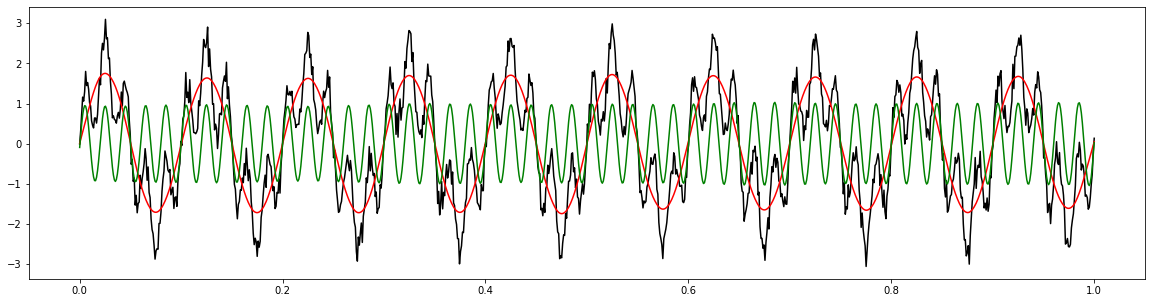

In [32]:
A1, U1, V1 = SSA_modes(F, 50)
A2, U2, V2 = SSA_modes(F, 100)

plt.figure(figsize = (20, 5)) 
plt.plot(t, F, 'k')
plt.plot(t, SSA_group(A1, U1, V1, len(F), [0, 1]), 'r')
plt.plot(t, SSA_group(A2, U2, V2, len(F), [2, 3]), 'g')

Задаем новый ВР:

In [61]:
t = np.linspace(0,4,4096)
F = np.exp(-0.4*np.pi*t) + 0.5*rand.randn(len(t))

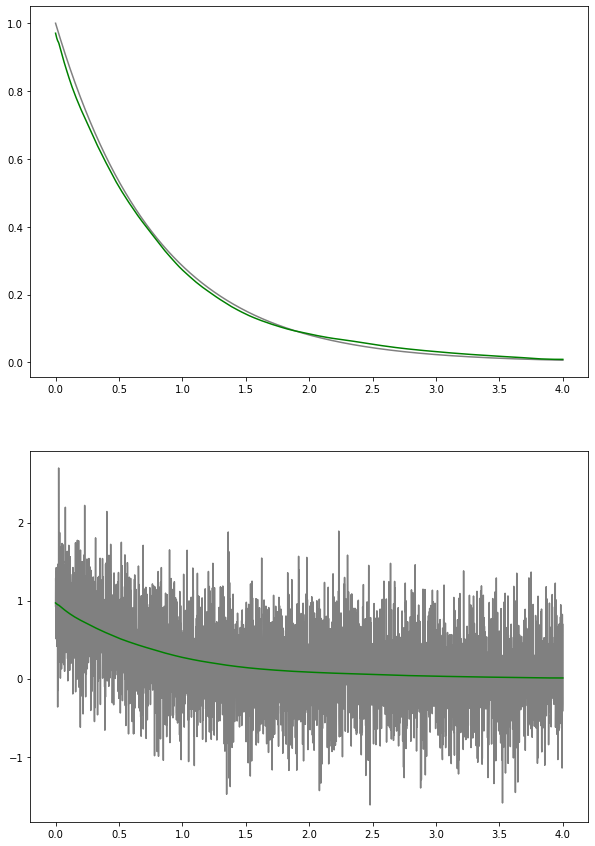

In [62]:
A3, U3, V3 = SSA_modes(F, 1500)

plt.figure(figsize = (10, 15))
plt.subplot(2,1,1)
plt.plot(t, np.exp(-0.4*np.pi*t), 'grey')
plt.plot(t, SSA_group(A3, U3, V3, len(F), [0]), 'g')

plt.subplot(2,1,2)
plt.plot(t, F, 'grey')
plt.plot(t, SSA_group(A3, U3, V3, len(F), [0]), 'g')

Создаем периодический сигнал с изломом частоты:

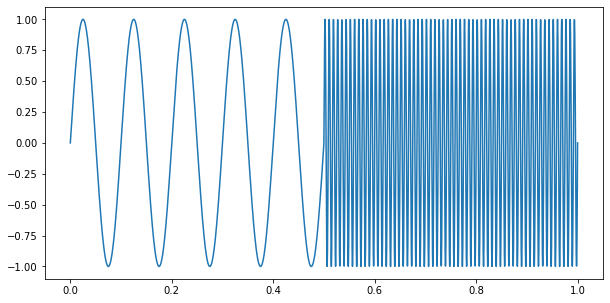

In [63]:
t = np.linspace(0, 1, 4096)
x2 = np.zeros(4096)
for i in range(0, len(t)//2):
    x2[i] = np.sin(2*np.pi*10*t[i]) 
for i in range(len(t)//2, len(t)):
    x2[i] = np.sin(2*np.pi*120*t[i])
plt.figure(figsize = (10, 5))
plt.plot(t, x2)
plt.show()

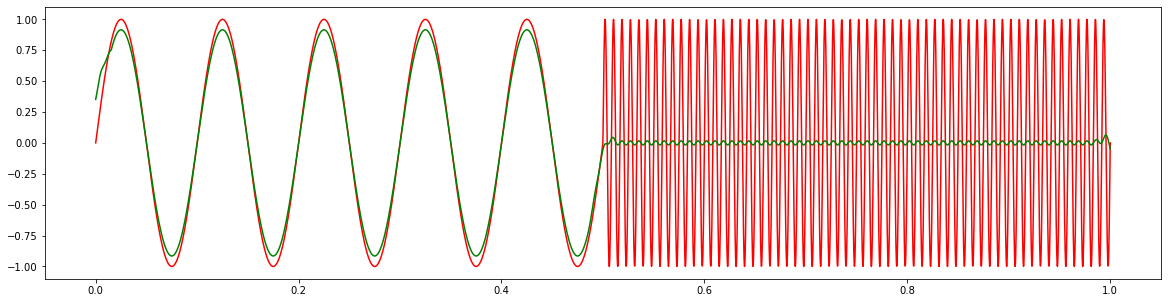

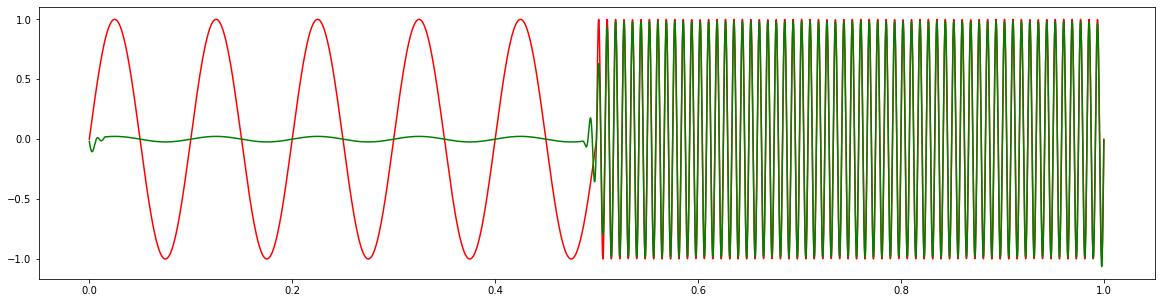

In [79]:
A4, U4, V4 = SSA_modes(x2, 64)

plt.figure(figsize = (20, 5)) 
plt.plot(t, x2, 'r') 
plt.plot(t, SSA_group(A4, U4, V4, len(x2), [0]), 'g')

plt.figure(figsize = (20, 5)) 
plt.plot(t, x2, 'r') 
plt.plot(t, SSA_group(A4, U4, V4, len(x2), [1, 2]), 'g')

Моделируем временной ряд из 4 гармоник с шумом.

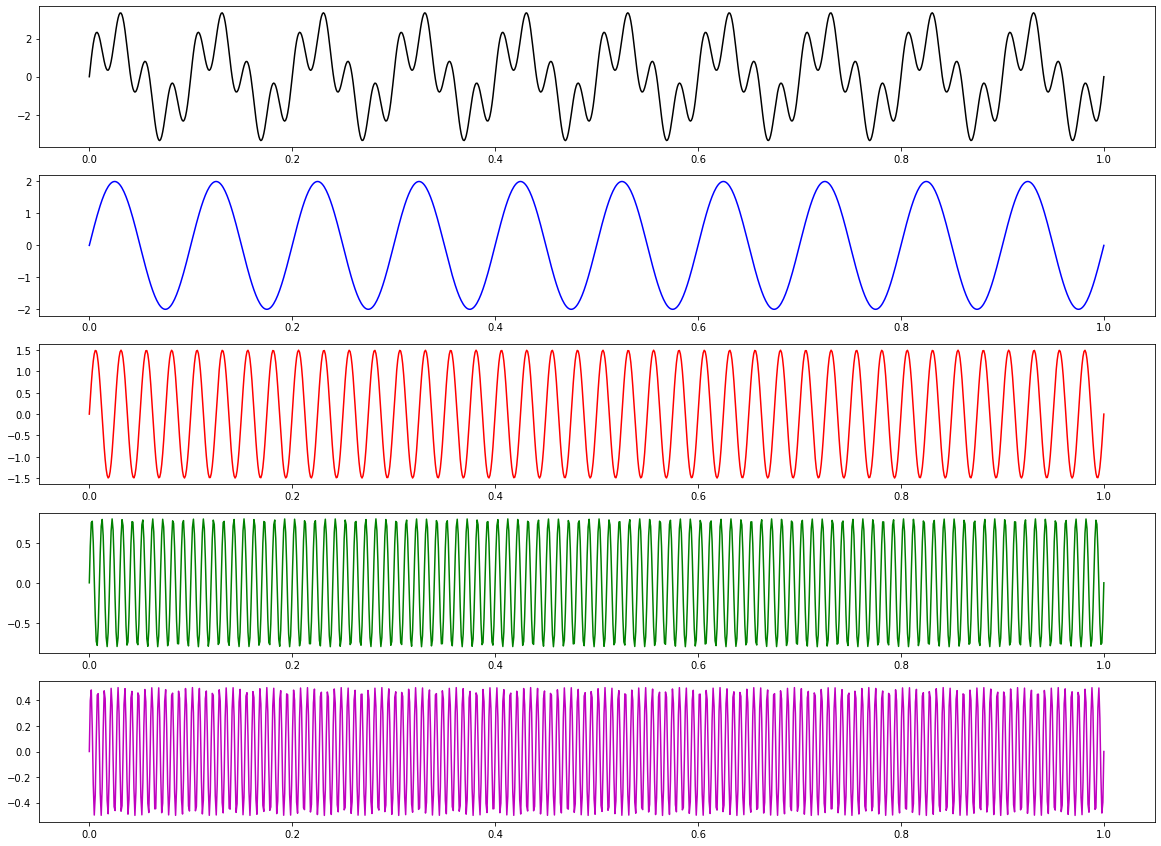

In [83]:
t = np.linspace(0,1,1024)
f1 = 10
f2 = 40
f3 = 100
f4 = 150
F=2.0*np.sin(2*np.pi*f1*t)+1.5*np.sin(2*np.pi*f2*t)
+0.8*np.sin(2*np.pi*f3*t)
+0.5*np.sin(2*np.pi*f4*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (20, 15))
plt.subplot(5,1,1)
plt.plot(t, F, 'k')
plt.subplot(5,1,2)
plt.plot(t, 2.0*np.sin(2*np.pi*f1*t), 'b')
plt.subplot(5,1,3)
plt.plot(t, 1.5*np.sin(2*np.pi*f2*t), 'r')
plt.subplot(5,1,4)
plt.plot(t, 0.8*np.sin(2*np.pi*f3*t), 'g')
plt.subplot(5,1,5)
plt.plot(t, 0.5*np.sin(2*np.pi*f4*t), 'm')
plt.show()

На основе метода SSA реализуем прогноз временных рядов.

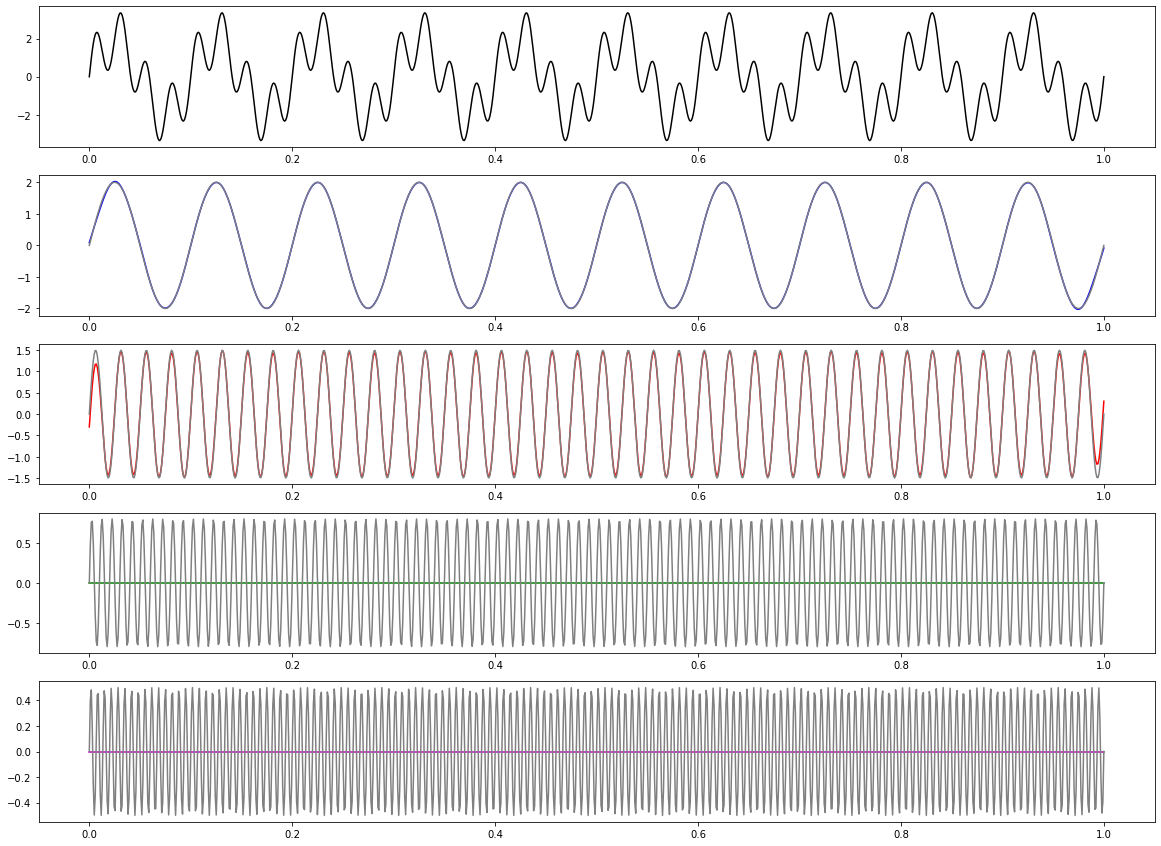

In [99]:
A5, U5, V5 = SSA_modes(F, 100)
A6, U6, V6 = SSA_modes(F, 150)
A7, U7, V7 = SSA_modes(F, 200)
A8, U8, V8 = SSA_modes(F, 300)

plt.figure(figsize = (20, 15)) 
plt.subplot(5,1,1) 
plt.plot(t, F, 'k') 
plt.subplot(5,1,2) 
plt.plot(t, SSA_group(A5, U5, V5, len(F), [0, 1]), 'b') 
plt.plot(t, 2.0*np.sin(2*np.pi*f1*t), 'grey')
plt.subplot(5,1,3) 
plt.plot(t, SSA_group(A6, U6, V6, len(F), [2, 3]), 'r') 
plt.plot(t, 1.5*np.sin(2*np.pi*f2*t), 'grey')
plt.subplot(5,1,4) 
plt.plot(t, SSA_group(A7, U7, V7, len(F), [4, 5]), 'g') 
plt.plot(t, 0.8*np.sin(2*np.pi*f3*t), 'grey')
plt.subplot(5,1,5) 
plt.plot(t, SSA_group(A8, U8, V8, len(F), [6, 7]), 'm') 
plt.plot(t, 0.5*np.sin(2*np.pi*f4*t), 'grey')
plt.show()

Прогноз методом SSA-R

In [100]:
def SSA_R (F, L, I, M):
    
    N = len(F)
    A, U, V = SSA_modes(F, L)
    G = SSA_group(A, U, V, len(F), I)
    
    vu = np.linalg.norm(U[-1, I])
    R = np.sum(U[L - 1, I] * U[0:L - 1, I], 1)
    R = R / (1 - vu * vu)
    Q = np.zeros(N+M)
    for i in range (N+M):
        q=0
        if (i < N):
            Q[i] = G[i]
        else:
            for j in range(L-2):
                q = q + R[j]*Q[i-j-1]
            Q[i] = q
            
    return Q

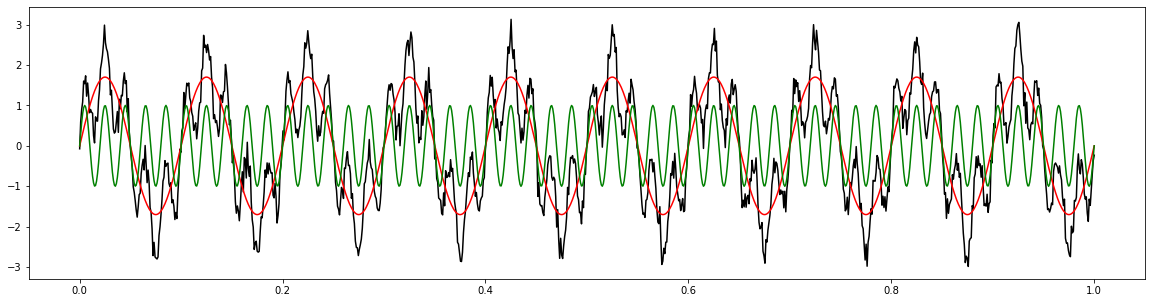

In [101]:
t = np.linspace(0, 1, 1024)
f1 = 10
f2 = 50
F=1.7*np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (20, 5))
plt.plot(t, F, 'k')
plt.plot(t, 1.7*np.sin(2*np.pi*f1*t), 'r') #первая пероидика
plt.plot(t, np.sin(2*np.pi*f2*t), 'g') # вторая периодика
plt.show()

Строим прогноз для этого ряда на 256 точек вперед модельный ряд из 2 периодик с шумом:

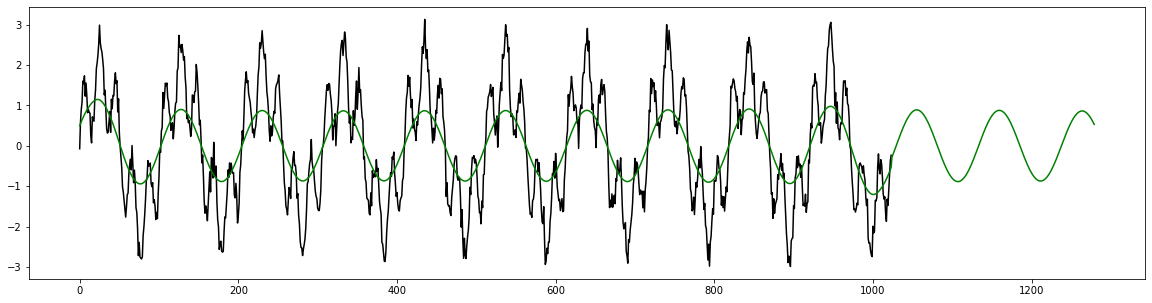

In [115]:
P1 = SSA_R(F, 420, [0], 256)
plt.figure(figsize = (20, 5))
plt.plot(F, 'k')
plt.plot(P1, 'g')

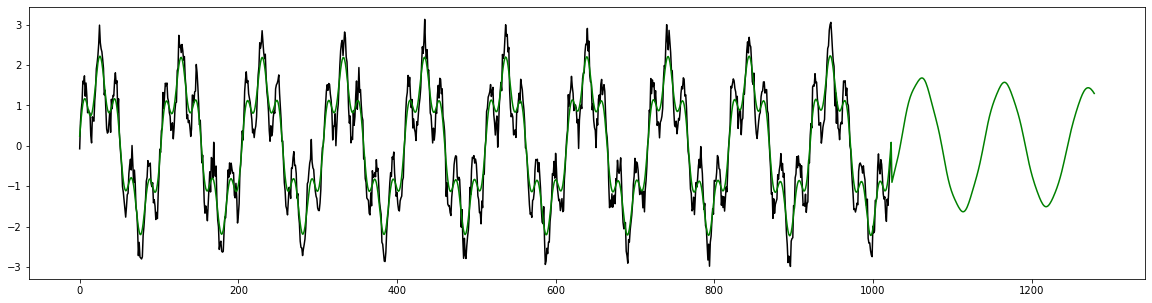

In [116]:
P1 = SSA_R(F, 420, [2,1,0], 256)
plt.figure(figsize = (20, 5))
plt.plot(F, 'k')
plt.plot(P1, 'g')

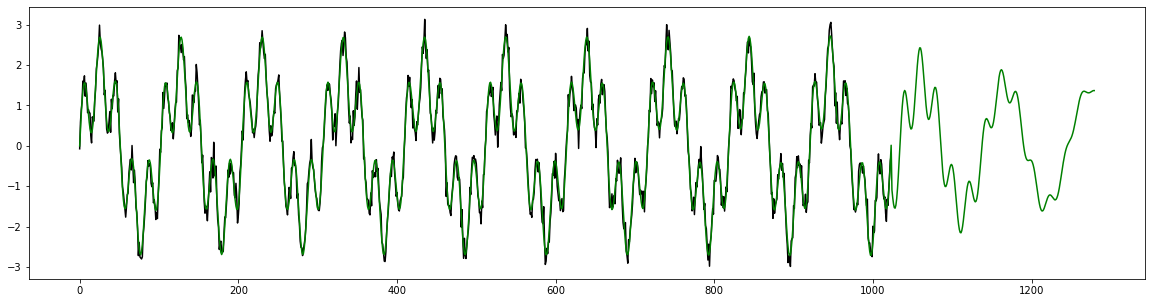

In [117]:
P1 = SSA_R(F, 420, [3,2,1,0], 256)
plt.figure(figsize = (20, 5))
plt.plot(F, 'k')
plt.plot(P1, 'g')

Оптимальные параметры подобраны.

Прогноз на 256 точек вперед для временной ряд из 4 гармоник с шумом:

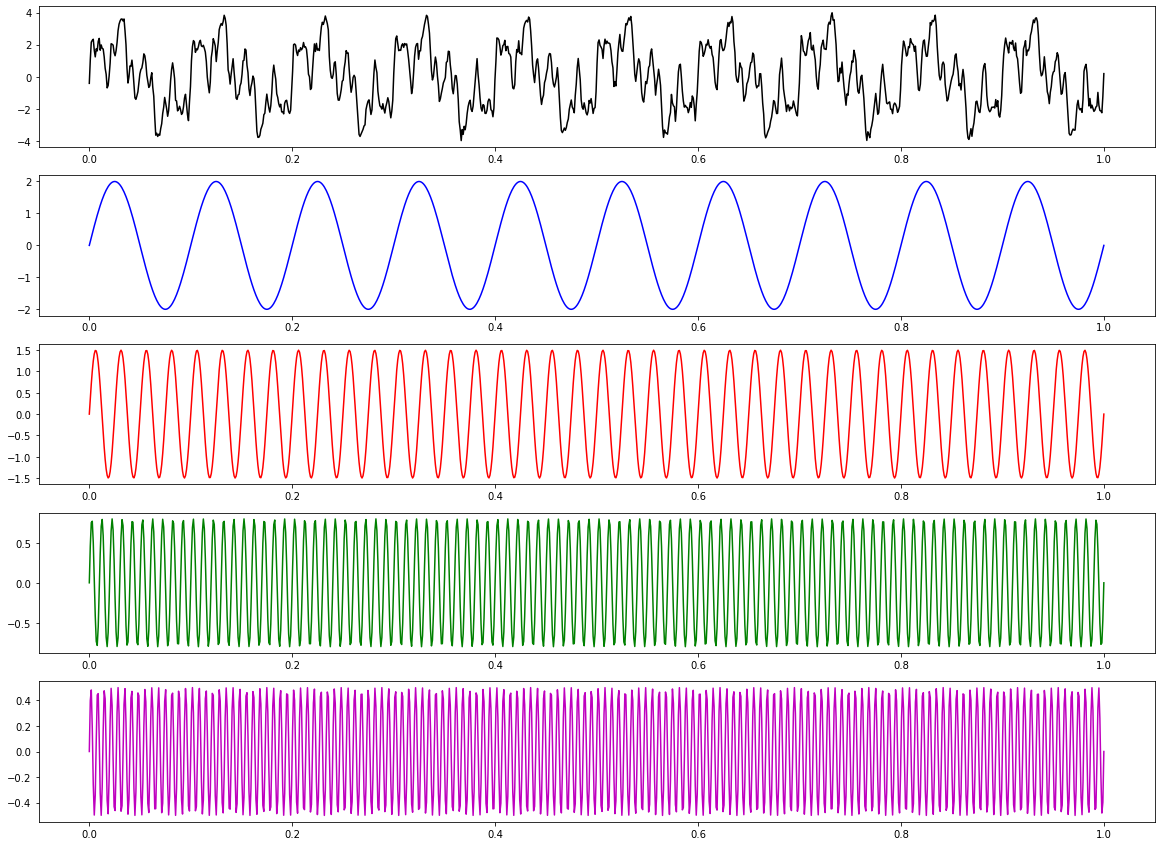

In [148]:
t = np.linspace(0,1,1024)
f1 = 10
f2 = 40
f3 = 100
f4 = 150
F=2.0*np.sin(2*np.pi*f1*t)+1.5*np.sin(2*np.pi*f2*t)+0.8*np.sin(2*np.pi*f3*t)+0.5*np.sin(2*np.pi*f4*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (20, 15))
plt.subplot(5,1,1)
plt.plot(t, F, 'k')
plt.subplot(5,1,2)
plt.plot(t, 2.0*np.sin(2*np.pi*f1*t), 'b')
plt.subplot(5,1,3)
plt.plot(t, 1.5*np.sin(2*np.pi*f2*t), 'r')
plt.subplot(5,1,4)
plt.plot(t, 0.8*np.sin(2*np.pi*f3*t), 'g')
plt.subplot(5,1,5)
plt.plot(t, 0.5*np.sin(2*np.pi*f4*t), 'm')
plt.show()

In [205]:
Q_0 = SSA_R(F, 420, [0,1], 256)
Q_12 = SSA_R(F, 410, [3,2], 256)  
Q_34 = SSA_R(F, 420, [4,5], 256) 
Q_56 = SSA_R(F, 410, [6], 256) 

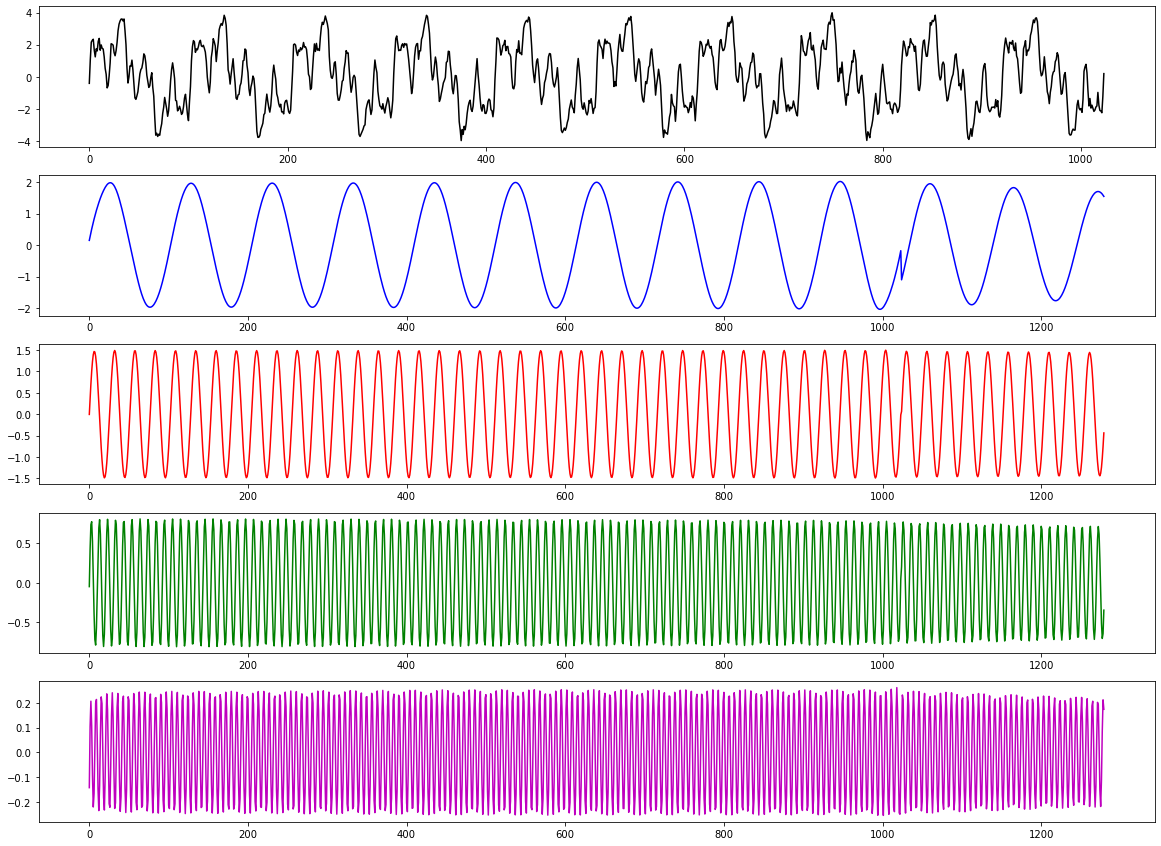

In [206]:
plt.figure(figsize = (20, 15)) 
plt.subplot(5,1,1) 
plt.plot(F, 'k')

plt.subplot(5,1,2) 
plt.plot(Q_0, 'b') # подборка 1 периодики

plt.subplot(5,1,3) 
plt.plot(Q_12, 'r') # подборка 2 периодики

plt.subplot(5,1,4) 
plt.plot(Q_34, 'g') # подборка 3 периодики

plt.subplot(5,1,5) 
plt.plot(Q_56, 'm') # подборка 4 периодики

plt.show()

Подгружаем mat-файла Fort.mat.

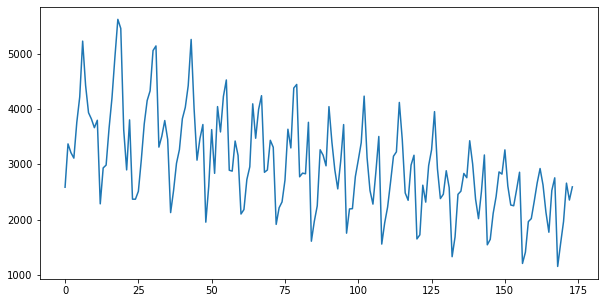

In [209]:
file = h5py.File(r'C:\Users\Морозова Маргарита\Downloads\Fort.mat')
data = file.get('Fort')
Fort = np.array(data)
F = np.ravel(fort)
plt.figure(figsize = (10, 5))
plt.plot(F)
plt.show()

Строим ретроспективный прогноз ряда.

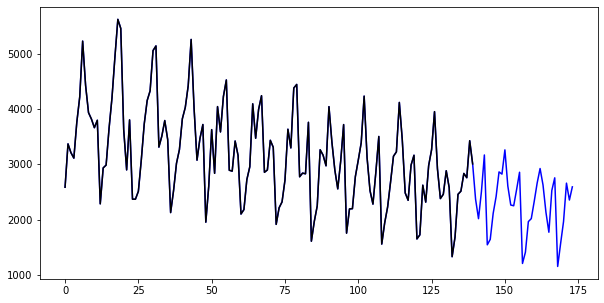

In [212]:
Z = Fort[:len(Fort)-35+1] #длина прогноза = 35
t=np.arange(0, len(Z), 1) 
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'b') 
plt.plot(t, Z, 'k') 
plt.show()

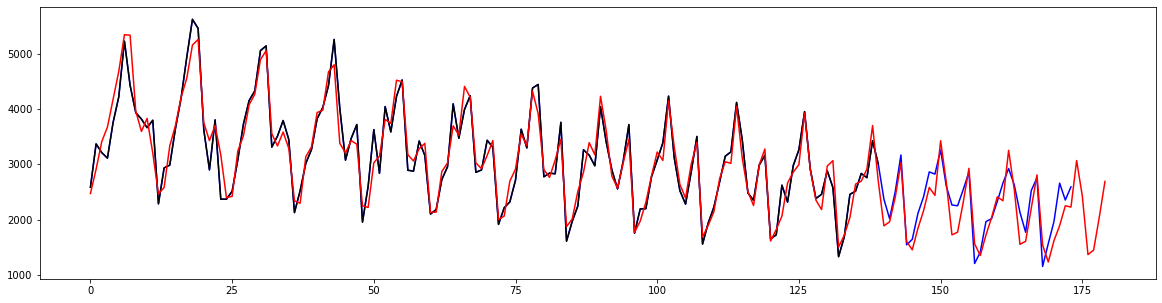

In [249]:
Q = SSA_R(Z, 60, [9,8,7,6,5,4,3,2,1,0], 40)

plt.figure(figsize = (20, 5))
plt.plot(Fort, 'b')
plt.plot(t, Z, 'k')
plt.plot(Q,'r')

In [241]:
def SSA_R_ST (F, L, I, M):
    
    for i in range (M-1):
        f_new = F[np.random.randint(0, len(F)-1)]
    
        while True:
            F_ = np.append(F, f_new)
            A, U, V = SSA_modes(F_, L)
            G = SSA_group(A, U, V, len(F_), I)
                
            if (f_new - G[len(G)-1] < 0.0001):
                break
            f_new = G[len(G)-1]
        F = F_       
        
    return F_ 

In [250]:
Q=SSA_R_ST(Z, 60, [9,8,7,6,5,4,3,2,1,0], 40)

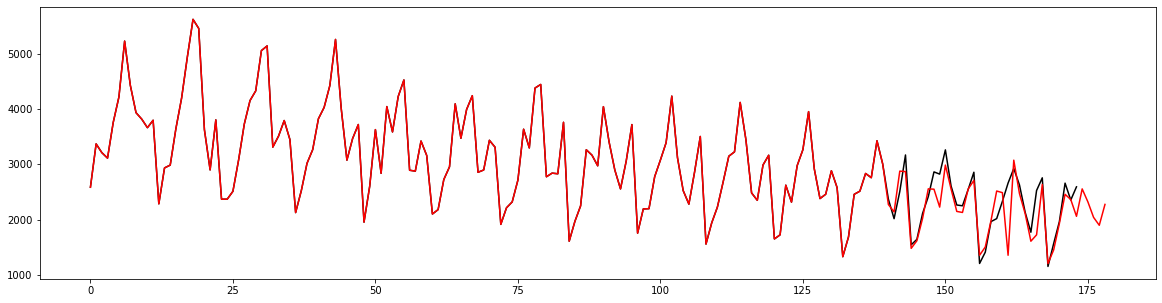

In [252]:
plt.figure(figsize = (20, 5))
plt.plot(Fort, 'k') 
plt.plot(Q,'r')